In [1]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize

In [2]:
from fastai.data.load import DataLoader
from fastai.data.core import DataLoaders, Datasets

In [6]:
from functools import partial

In [74]:
from pathlib import Path
data_root = Path('../data')

In [59]:
download_data = partial(FashionMNIST, root=data_root, download=True)
dset_train = download_data(train=True)
dset_test = download_data(train=False)

Sneaker


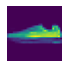

In [53]:
example_idx = 512
show_image(dset_train.data[example_idx])
target_class_idx = dset_train.targets[example_idx].item()
print(dset_train.classes[target_class_idx])

<AxesSubplot:>

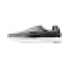

In [65]:
im_bw = PILImageBW.create(tfm_train.data[example_idx])
im_bw.show()

In [79]:
from fastai.data.block import DataBlock

In [89]:
doc(cnn_learner)

cnn_learner [source] cnn_learner ( dls , arch , normalize = True , n_out = None , pretrained = True , config = None , loss_func = None , opt_func = Adam , lr = 0.001 , splitter = None , cbs = None , metrics = None , path = None , model_dir = 'models' , wd = None , wd_bn_bias = False , train_bn = True , moms = (0.95, 0.85, 0.95) , cut = None , n_in = 3 , init = kaiming_normal_ , custom_head = None , concat_pool = True , lin_ftrs = None , ps = 0.5 , first_bn = True , bn_final = False , lin_first = False , y_range = None ) 
 
 Build a convnet style learner from dls and arch 
 Show in docs

In [75]:
block = DataBlock(blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(0.2),
                  get_y = parent_label)
loaders = block.dataloaders(data_root / 'FashionMNIST/processed')

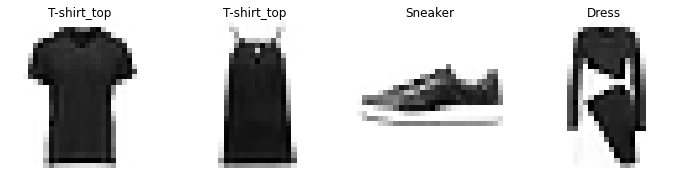

In [78]:
loaders.train.show_batch(max_n=4, nrows=1)

In [94]:
metrics = [accuracy, F1Score(average='weighted'), Precision(average='weighted'), Recall(average='weighted'), RocAuc(), HammingLoss(), Jaccard(average='weighted'), MatthewsCorrCoef()]
learn = cnn_learner(loaders, resnet18, metrics=metrics)

SuggestedLRs(valley=0.0020892962347716093)

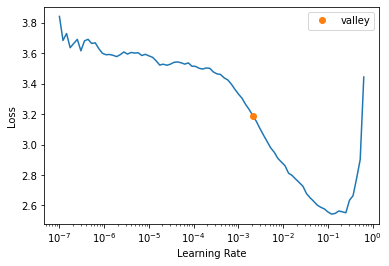

In [92]:
learn.lr_find()

In [95]:
learn.fine_tune(2, base_lr=2e-3, cbs=[ProgressCallback()])

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,hamming_loss,jaccard_score,matthews_corrcoef,time


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,hamming_loss,jaccard_score,matthews_corrcoef,time
0,0.834311,0.616917,0.777963,0.780979,0.788653,0.777963,0.971663,0.222037,0.653838,0.750847,00:16


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,hamming_loss,jaccard_score,matthews_corrcoef,time


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,hamming_loss,jaccard_score,matthews_corrcoef,time
0,0.349505,0.296085,0.891574,0.892261,0.897329,0.891574,0.992458,0.108426,0.814406,0.878542,00:26
1,0.246953,0.224300,0.916574,0.916853,0.917256,0.916574,0.994681,0.083426,0.853665,0.906150,00:26


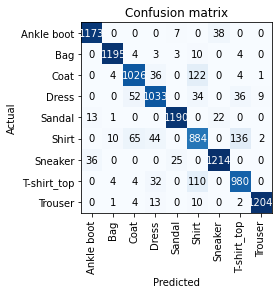

In [97]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [130]:
doc(ClassificationInterpretation)

class ClassificationInterpretation [source] ClassificationInterpretation ( dl , inputs , preds , targs , decoded , losses ) :: Interpretation 
 
 Interpretation methods for classification models. 
 Show in docs

In [105]:
interp.top_losses(10)

torch.return_types.topk(
values=TensorBase([9.4250, 9.3575, 8.5711, 8.4914, 8.1065, 7.7431, 7.2228, 6.9542, 6.9464,
        6.8071]),
indices=TensorBase([9127, 8315, 5401, 9655, 8792, 9527, 6213, 9106, 1542, 8580]))

In [107]:
interp.most_confused(min_val=100)

[('Shirt', 'T-shirt_top', 136),
 ('Coat', 'Shirt', 122),
 ('T-shirt_top', 'Shirt', 110)]

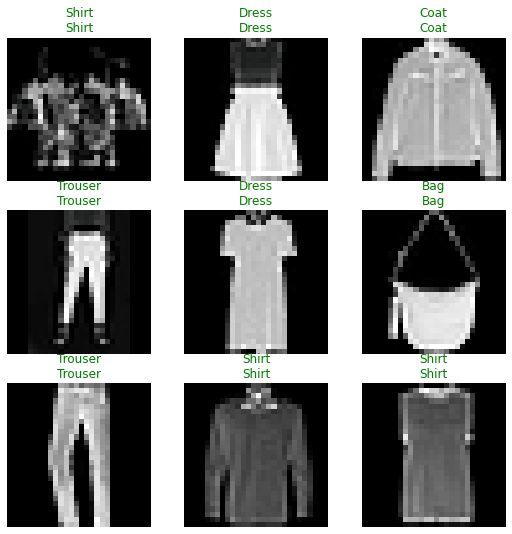

In [103]:
learn.show_results()

In [108]:
result = learn.validate()

In [127]:
[metric.name for metric in learn.metrics]

['accuracy',
 'f1_score',
 'precision_score',
 'recall_score',
 'roc_auc_score',
 'hamming_loss',
 'jaccard_score',
 'matthews_corrcoef']

In [128]:
interp.targs

TensorCategory([2, 5, 3,  ..., 2, 0, 0])

In [129]:
interp.decoded

tensor([2, 5, 3,  ..., 2, 0, 0])